In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(1337) 
import cv2 as cv

In [9]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

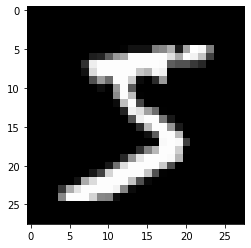

In [10]:
plt.imshow(X_train[0],cmap='gray')

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_train=X_train.reshape(60000,28*28)
X_test = X_test.reshape(-1,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
print("Xtrainshape{}\nXtestshape{}".format(X_train.shape[0],X_test.shape[0]))

Xtrainshape60000
Xtestshape10000


In [14]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [15]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='sigmoid'))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train,epochs=40,batch_size=128,verbose=1,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 67us/step - loss: 2.3013 - accuracy: 0.1107 - val_loss: 2.2970 - val_accuracy: 0.1135
Epoch 2/40
60000/60000 [==============================] - 4s 64us/step - loss: 2.2958 - accuracy: 0.1234 - val_loss: 2.2904 - val_accuracy: 0.1333
Epoch 3/40
60000/60000 [==============================] - 4s 71us/step - loss: 2.2898 - accuracy: 0.1374 - val_loss: 2.2860 - val_accuracy: 0.1296
Epoch 4/40
60000/60000 [==============================] - 4s 68us/step - loss: 2.2827 - accuracy: 0.1586 - val_loss: 2.2799 - val_accuracy: 0.2245
Epoch 5/40
60000/60000 [==============================] - 4s 72us/step - loss: 2.2749 - accuracy: 0.1772 - val_loss: 2.2701 - val_accuracy: 0.1158
Epoch 6/40
60000/60000 [==============================] - 4s 73us/step - loss: 2.2652 - accuracy: 0.1985 - val_loss: 2.2581 - val_accuracy: 0.2524
Epoch 7/40
60000/60000 [==============================] - 6s 95us/st

In [18]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 55us/step


[0.48544650106430054, 0.8587999939918518]

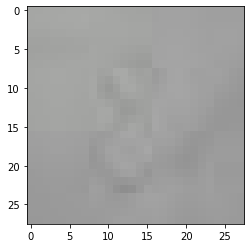

In [24]:
image=cv.imread('8.jpg',0)
colorimage=cv.imread('8.jpg',1)
plt.imshow(colorimage)

In [25]:
imagereshape=image.reshape(-1,784)

In [26]:
imagereshape.shape

(1, 784)

In [27]:
predicted=model.predict(imagereshape)

In [28]:
print("Predicted number is :{}".format(np.argmax(predicted)))

Predicted number is :8
